# Perceptron

In this section we will investigate the most primitive component of neural networks. The neuron.

This version of the neuron is called a perceptron.

The goal is to write your own perceptron.

As usual, we have a few imports and helper functions.

In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
import numpy as np

In [2]:
h = 0.025
colours = np.array(["r", "b", "g", "k", "c", "m"])
def plot_decision(ax, clf, X):
    cmap = ListedColormap(colours[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([clf.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
def plot_points(ax, X, y):
    ax.plot
    ax.scatter(X[:, 0], X[:, 1], c=colours[y])

We're going to use the iris dataset for this, for no particular reason. For this version of the perceptron though we need to make sure the classes are linearly separable.

In [3]:
iris = datasets.load_iris()
X, y = (iris.data[:100, [0, 2]], iris.target[:100])  # For simplicity, pick only two features and only two classes
y[y == 0] = -1.0

Let us create a class that provides a Perceptron.

To do this you will need to implement the following algorithm:

1. foreach iteration
    1. foreach instance
        1. Predict $\hat{y}$
        2. Calculate the error between $y$ and $\hat{y}$
        3. Create the weight update according to the perceptron learning rule

With the following equations...

The net input:

$z=w_0 + w_1x_1+\dots+w_mx_m$

The activation function:

$ \hat{y} = \phi(z) = \begin{cases}
1 &\text{if } z \ge \theta, \\\\
-1 &\text{otherwise}
\end{cases}
$

The weight update:

$ w_j = w_j + \Delta w_j$


Where $\Delta w_j$ is the perceptron learning rule:

$ \Delta w_j = \eta \left( y - \hat{y} \right) x_j $

---

Once this is done, you should be able to see a valid error chart. It should start high and end at zero.

In [4]:
class Perceptron():
    def __init__(self, itr=10, eta=0.01) -> None:
        self.n_iterations = itr
        self.eta = eta

    def fit(self, X, y) -> None:
        self.w_ = np.zeros(X.shape[1] + 1)              # Add one for bias input (threshold)
        self.errors_ = np.zeros(self.n_iterations)      # Array for holding errors

        for i in range(self.n_iterations):              # Foreach iteration
            for (x_i, y_i) in zip(X, y):                # Foreach training instance
                y_hat = self.predict(x_i)               # Predict output
                self.errors_[i] += np.abs(y_i - y_hat)  # Add error to the current error sum

                update = self.eta * (y_i - y_hat)       # Weights update equation
                self.w_[1:] += update * x_i             # Update the weights given input
                self.w_[0] += update                    # Update the bias weight

    def activation(self, z):
        if z >= 0:
            return 1
        else:
            return -1

    def net_input(self, X):
        return np.dot(self.w_[1:].T, X) + self.w_[0]    # Sum of weighted inputs

    def predict(self, X):
        return self.activation(self.net_input(X))       # Given X => net input => activate

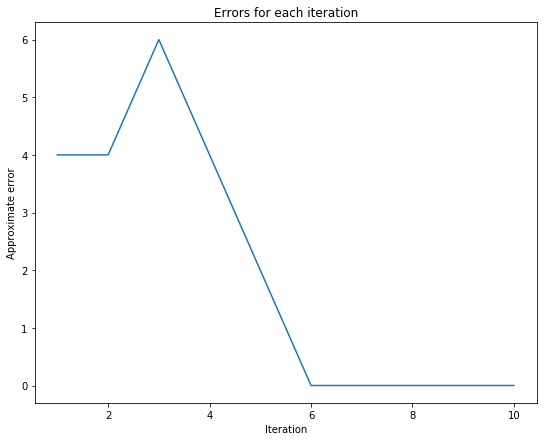

In [5]:
clf = Perceptron(eta=0.1, itr=10)
clf.fit(X, y)
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_)
ax.set_title("Errors for each iteration")
ax.set_xlabel("Iteration")
ax.set_ylabel("Approximate error")
plt.show()

Now let's plot the decision boundary and the data.

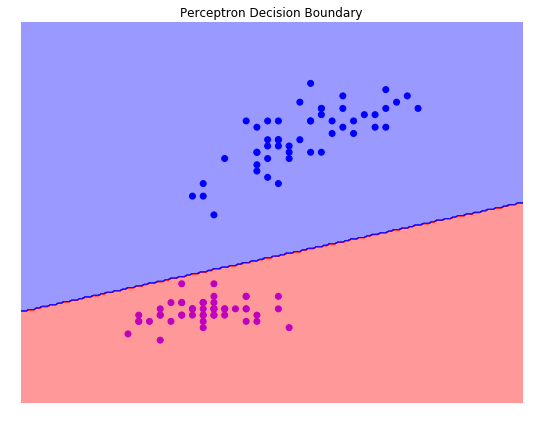

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))
plot_decision(ax, clf, X)
plot_points(ax, X, y)
ax.set_axis_off()
ax.set_title("Perceptron Decision Boundary")
plt.show()

## Bonus tasks

### Tasks:

- Instead of initialising the weights with zeros, intialise them randomly. What happens?
- Try with a different dataset
- Try with a non-separable dataset
- Try different ways of implementing the perceptron. Using matrix math maybe?